# Multiclass Logistic Regression(Softmax Regression) implementation from scratch

In [1]:
!pip install python-mnist

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from mnist.loader import MNIST

In [3]:
def softmax(theta):
  theta -= np.max(theta) 
  return np.exp(theta) / np.sum(np.exp(theta)) 

In [4]:
def grad_L(X, y, W, lam, numberofclasses):

    total_len, dW = len(y), 0
    for i in range(total_len):
      y_vector = np.zeros(numberofclasses)
      y_vector[y[i]] = 1
      dW += np.dot(X[i,:].reshape(X.shape[1],1),(y_vector - softmax(np.dot(W.T,X[i,:]))).reshape(1,numberofclasses))

    return ((-1/total_len)*dW + lam*W)

In [5]:
def L_function(X, y, W, lam, numberofclasses):

    loss, total_len = 0, len(y)
    for i in range(total_len):
        y_vector = np.zeros(numberofclasses)
        y_vector[y[i]] = 1
        loss += np.sum(y_vector * np.log(softmax(np.dot(W.T,X[i,:]))))
    w_sum = 0
    for i in range(X.shape[1]):
      for j in range(numberofclasses):
        w_sum += W[i,j]**2
    
    loss = loss * (-1/total_len) + lam/2 * w_sum
    return loss


In [6]:
def predict(X, W):

    y_pred = []
    for i in range(X.shape[0]):
      y_pred.append(np.argmax(softmax(np.dot(W.T,X[i,:]))))

    return y_pred

In [7]:
def reg_rate(X, y, W):

    y_pred = predict(X, W)
    accuracy = np.mean(y == y_pred)
    return accuracy

In [8]:
def SGD(X, y, W, batch_size, eta, numberofclasses, iteration_num=100):  

    all_Ws = []
    for i in range(iteration_num):
      list1 = random.sample(range(len(y)), batch_size)
      new_x = X[list1[0],:]
      new_y = np.array(y[list1[0]])
      for i in list1[1:]:
        new_x = np.vstack((new_x,X[i,:]))
        new_y = np.hstack((new_y,y[i]))
      all_Ws.append(W)
      W = W - eta * grad_L(new_x,new_y, W, lam, numberofclasses)

    return (W, all_Ws)

## Testing accuracy of scract implementation on popular datasets

### Iris dataset

In [22]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
n = X_train.shape[0]
dim = X_train.shape[1] 
num_classes = 3

W = 0.001 * np.random.randn(dim, num_classes)


batch_size = X_train.shape[0]
eta = 0.1653 # learning rate 
lam = 0.2
num_iterations = 300

(W_best_sgd, all_xs_sgd200) = SGD(X_train, y_train, W, batch_size=batch_size, eta=eta, numberofclasses=num_classes, iteration_num=num_iterations)

In [ ]:
y_test_pred = predict(X_test, W_best_sgd)
test_accuracy = np.mean(y_test == y_test_pred)
print('test accuracy is', test_accuracy)

test accuracy is 0.8947368421052632


### Wine dataset

In [ ]:
from sklearn.datasets import load_wine
wine = load_wine()
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
n = X_train.shape[0]
dim = X_train.shape[1]
num_classes = 3

W = 0.001 * np.random.randn(dim, num_classes)

batch_size = n
eta = 0.05 # learning rate 
lam = 0.1
num_iterations = 300

(W_best_sgd, all_xs_sgd200) = SGD(X_train, y_train, W, batch_size=batch_size, eta=eta, numberofclasses=num_classes, iteration_num=num_iterations)

In [ ]:
y_test_pred = predict(X_test, W_best_sgd)
test_accuracy = np.mean(y_test == y_test_pred)
print('test accuracy is', test_accuracy)

test accuracy is 0.7333333333333333


### Digits dataset

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
n = X_train.shape[0]
dim = X_train.shape[1]
num_classes = 10

W = 0.001 * np.random.randn(dim, num_classes)

batch_size = X_train.shape[0]
eta = 0.3 # learning rate 
lam = 0.2
num_iterations = 100

# Optimize values of W, on the training data.
(W_best_sgd, all_xs_sgd200) = SGD(X_train, y_train, W, batch_size=batch_size, eta=eta, numberofclasses=num_classes, iteration_num=num_iterations)

In [ ]:
y_test_pred = predict(X_test, W_best_sgd)
test_accuracy = np.mean(y_test == y_test_pred)
print('test accuracy is', test_accuracy)

test accuracy is 0.9333333333333333


# Logistic Regression of scikit-learn library

## Testing accuracy on different datasets

### Iris dataset

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='saga', multi_class='auto')
classifier.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(random_state=0, solver='saga')

In [ ]:
y_pred = classifier.predict(X_test)
test_accuracy = np.mean(y_test == y_pred)
print('test accuracy is', test_accuracy)

test accuracy is 0.9473684210526315


### Wine dataset

In [ ]:
from sklearn.datasets import load_wine
wine = load_wine()
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(fit_intercept = False, random_state = 0, solver='saga', multi_class='auto')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
test_accuracy = np.mean(y_test == y_pred)
print('test accuracy is', test_accuracy)

test accuracy is 0.7777777777777778


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


### Digits dataset

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='saga', multi_class='auto')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
test_accuracy = np.mean(y_test == y_pred)
print('test accuracy is', test_accuracy)

test accuracy is 0.9622222222222222


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


# Implementation of the modification suggested

In [13]:
def uniform(z):
  return z / np.sum(z) 

In [14]:
def my_predict(X, W):

    y_pred = []
    for i in range(X.shape[0]):
      y_pred.append(np.argmax(uniform(np.dot(W.T,X[i,:]))))

    return y_pred

In [15]:
def my_reg_rate(X, y, W):

    y_pred = my_predict(X, W)
    accuracy = np.mean(y == y_pred)
    return accuracy

## Testing accuracy on different datasets

### Iris dataset

In [23]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [24]:
n = X_train.shape[0]
dim = X_train.shape[1] 
num_classes = 3

W = 0.001 * np.random.randn(dim, num_classes)

batch_size = X_train.shape[0]
eta = 0.1653 # learning rate 
lam = 0.2
num_iterations = 300

(W_best_sgd, all_xs_sgd200) = SGD(X_train, y_train, W, batch_size=batch_size, eta=eta, numberofclasses=num_classes, iteration_num=num_iterations)

In [25]:
y_test_pred = my_predict(X_test, W_best_sgd)
test_accuracy = np.mean(y_test == y_test_pred)
print('test accuracy is', test_accuracy)

test accuracy is 0.8947368421052632


In [26]:
y_test_pred = predict(X_test, W_best_sgd)
test_accuracy = np.mean(y_test == y_test_pred)
print('test accuracy is', test_accuracy)

test accuracy is 0.8947368421052632


### Wine dataset

In [27]:
from sklearn.datasets import load_wine
wine = load_wine()
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [28]:
n = X_train.shape[0]
dim = X_train.shape[1] 
num_classes = 3

W = 0.001 * np.random.randn(dim, num_classes)

batch_size = n
eta = 0.05 # learning rate 
lam = 0.1
num_iterations = 300

(W_best_sgd, all_xs_sgd200) = SGD(X_train, y_train, W, batch_size=batch_size, eta=eta, numberofclasses=num_classes, iteration_num=num_iterations)

In [31]:
y_test_pred = my_predict(X_test, W_best_sgd)
test_accuracy = np.mean(y_test == y_test_pred)
print('test accuracy is', test_accuracy)

test accuracy is 0.7333333333333333


In [32]:
y_test_pred = predict(X_test, W_best_sgd)
test_accuracy = np.mean(y_test == y_test_pred)
print('test accuracy is', test_accuracy)

test accuracy is 0.7333333333333333


### Digits dataset

In [33]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [34]:
n = X_train.shape[0]
dim = X_train.shape[1] 
num_classes = 10


W = 0.001 * np.random.randn(dim, num_classes)

batch_size = X_train.shape[0]
eta = 0.3 # learning rate 
lam = 0.2
num_iterations = 100

(W_best_sgd, all_xs_sgd200) = SGD(X_train, y_train, W, batch_size=batch_size, eta=eta, numberofclasses=num_classes, iteration_num=num_iterations)

In [38]:
y_test_pred = my_predict(X_test, W_best_sgd)
test_accuracy = np.mean(y_test == y_test_pred)
print('test accuracy is', test_accuracy)

test accuracy is 0.83555555555555555


In [37]:
y_test_pred = predict(X_test, W_best_sgd)
test_accuracy = np.mean(y_test == y_test_pred)
print('test accuracy is', test_accuracy)

test accuracy is 0.9333333333333333


### MNIST dataset

In [9]:
mndata = MNIST()
X_train, Y_train = map(np.array, mndata.load_training())
X_test, Y_test = map(np.array, mndata.load_testing())
X_train = X_train / 255.0
X_test = X_test / 255.0

In [10]:
n = X_train.shape[0]
dim = X_train.shape[1] 
num_classes = 10

W = 0.001 * np.random.randn(dim, num_classes)

batch_size = 500
eta = 0.2 # learning rate 
lam = 0.1
num_iterations = 100

(W_best_sgd, all_xs_sgd200) = SGD(X_train, Y_train, W, batch_size=batch_size, eta=eta, numberofclasses=num_classes, iteration_num=num_iterations)

In [11]:
y_test_pred = predict(X_test, W_best_sgd)
test_accuracy = np.mean(Y_test == y_test_pred)
print('test accuracy is', test_accuracy)

test accuracy is 0.8679


In [16]:
y_test_pred = my_predict(X_test, W_best_sgd)
test_accuracy = np.mean(Y_test == y_test_pred)
print('test accuracy is', test_accuracy)

test accuracy is 0.5499


## Learning dynamics of scratch implementation

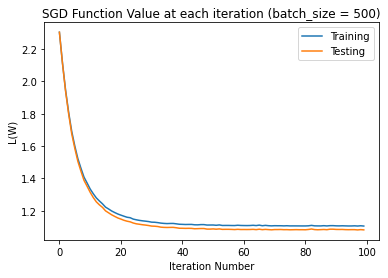

In [19]:
plt.figure(1)
plt.plot([L_function(X=X_train, y=Y_train, W=x, lam=lam, numberofclasses=num_classes) for x in all_xs_sgd200])
plt.plot([L_function(X=X_test, y=Y_test, W=x, lam=lam, numberofclasses=num_classes) for x in all_xs_sgd200]) # use parameters learned from training dataset
plt.title('SGD Function Value at each iteration (batch_size = 500)')
plt.ylabel('L(W)')
plt.xlabel('Iteration Number')
plt.legend(['Training', 'Testing'])
plt.show()

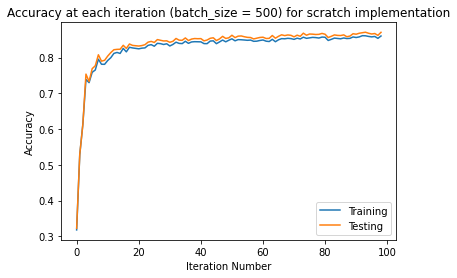

In [20]:
plt.figure(2)
# skips plotting the error rate at iteration zero with w = 0
plt.plot([reg_rate(X=X_train, y=Y_train, W=x) for x in all_xs_sgd200[1:]])
plt.plot([reg_rate(X=X_test, y=Y_test, W=x) for x in all_xs_sgd200[1:]]) # use parameters learned from training dataset
plt.title('Accuracy at each iteration (batch_size = 500) for scratch implementation')
plt.ylabel('Accuracy')
plt.xlabel('Iteration Number')
plt.legend(['Training', 'Testing'])
plt.show()


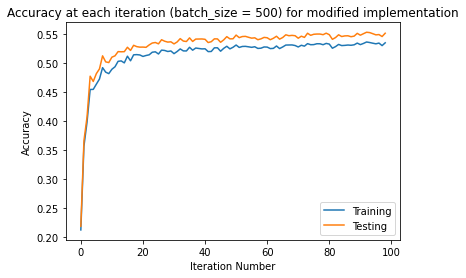

In [21]:
plt.figure(3)
# skips plotting the error rate at iteration zero with w = 0
plt.plot([my_reg_rate(X=X_train, y=Y_train, W=x) for x in all_xs_sgd200[1:]])
plt.plot([my_reg_rate(X=X_test, y=Y_test, W=x) for x in all_xs_sgd200[1:]]) # use parameters learned from training dataset
plt.title('Accuracy at each iteration (batch_size = 500) for modified implementation')
plt.ylabel('Accuracy')
plt.xlabel('Iteration Number')
plt.legend(['Training', 'Testing'])
plt.show()


# Reasons why standard normalization performs worse

In [22]:
print(softmax(np.array([1,-4])))

[0.99330715 0.00669285]


In [23]:
print(uniform(np.array([1,-4])))

[-0.33333333  1.33333333]
